In [0]:
#importing required modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report 
from sklearn import tree
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set()

In [3]:
#reading csv file
datam=pd.read_csv("/content/drive/My Drive/tuma/tumo.csv")
datam


,class,age,sex,his_typ,dod,bone,bon_m,lung,pleura,perit,liver,brain,skin,neck,supra,axillar,media,abdm
0,1,1,1,?,3,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,22,2,2,2,?,2,2,2,2,2,2,2,2,2,2,1,2,2
335,22,2,2,2,?,2,2,2,2,2,2,2,2,2,2,1,2,2
336,22,2,2,?,?,1,2,2,2,2,2,2,2,2,1,1,2,2
337,22,3,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2


In [0]:
def conq(x):
  if x != x :
    pass
  else:
    return str(x)
datam=datam.applymap(lambda x:conq(x))

In [5]:
#replacing ? with np.nan
for cols in datam:
  datam[cols]=datam[cols].replace({"?":np.nan})
datam

,class,age,sex,his_typ,dod,bone,bon_m,lung,pleura,perit,liver,brain,skin,neck,supra,axillar,media,abdm
0,1,1,1,NaN,3,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,NaN,3,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,NaN,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,NaN,3,1,2,1,1,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,22,2,2,2,NaN,2,2,2,2,2,2,2,2,2,2,1,2,2
335,22,2,2,2,NaN,2,2,2,2,2,2,2,2,2,2,1,2,2
336,22,2,2,NaN,NaN,1,2,2,2,2,2,2,2,2,1,1,2,2
337,22,3,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2


In [0]:
def conq(x):
  if x != x :
    pass
  else:
    return float(x)
datam=datam.applymap(lambda x:conq(x))

In [0]:
#change class name to type0
datam=datam.rename(columns={"class":"typeo"})

In [8]:
#class distribution
datam.typeo. value_counts()

1.0     84
5.0     39
18.0    29
11.0    28
14.0    24
22.0    24
2.0     20
12.0    16
7.0     14
4.0     14
17.0    10
3.0      9
13.0     7
19.0     6
8.0      6
15.0     2
10.0     2
20.0     2
16.0     1
21.0     1
6.0      1
Name: typeo, dtype: int64

In [9]:
plt.figure(figsize=(10,10))
corre=datam.iloc[:,1:26].corr()
corre=corre.abs()
#ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)

<Figure size 720x720 with 0 Axes>

In [10]:
data_no_na=datam[datam['typeo']==9]
for i in range(1,23):
    if i==9:
      pass
    else:
      datan=datam[datam["typeo"]==i]
      for cols in datan:
        try:
          datan[cols]=datan[cols].fillna(datan[cols].mode()[0])
        except:
          datan[cols]=datan[cols].fillna(datam[cols].mode()[0])
      data_no_na=data_no_na.append(datan)
data_no_na

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,typeo,age,sex,his_typ,dod,bone,bon_m,lung,pleura,perit,liver,brain,skin,neck,supra,axillar,media,abdm
0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
2,1.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
3,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
4,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,22.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
335,22.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
336,22.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
337,22.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0


In [0]:
data_no_na.isna().any()
datam=data_no_na

In [12]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
y=datam.iloc[:,0]
X=datam.iloc[:,1:18]

In [14]:
len(X)

339

In [15]:
sampler = RandomOverSampler()
X_rs, y_rs = sampler.fit_sample(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
dt=pd.DataFrame(y_rs)
len(y_rs)

1764

In [25]:
dt=dt.rename(columns={0:"cl"})
dt.cl.value_counts()

22.0    84
11.0    84
2.0     84
3.0     84
4.0     84
5.0     84
6.0     84
7.0     84
8.0     84
10.0    84
12.0    84
21.0    84
13.0    84
14.0    84
15.0    84
16.0    84
17.0    84
18.0    84
19.0    84
20.0    84
1.0     84
Name: cl, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.30, random_state=42)
# x is the train data and y is the predicted value and test size is 30% 
#remaining 70 for training

Predicted values:
              precision    recall  f1-score   support

         1.0       1.00      0.73      0.84        22
         2.0       0.90      1.00      0.95        26
         3.0       0.93      1.00      0.96        25
         4.0       0.95      0.70      0.81        30
         5.0       0.94      0.67      0.78        24
         6.0       0.96      1.00      0.98        25
         7.0       0.92      1.00      0.96        24
         8.0       0.95      0.88      0.91        24
        10.0       1.00      1.00      1.00        19
        11.0       0.83      0.87      0.85        23
        12.0       0.86      0.79      0.83        24
        13.0       1.00      1.00      1.00        26
        14.0       0.57      0.84      0.68        25
        15.0       1.00      1.00      1.00        25
        16.0       1.00      1.00      1.00        24
        17.0       1.00      0.79      0.88        33
        18.0       0.74      1.00      0.85        26
        1

[Text(154.45863970588235, 525.48, 'X[2] <= 1.5\ngini = 0.952\nsamples = 1234\nvalue = [62, 58, 59, 54, 60, 59, 60, 60, 65, 61, 60, 58\n59, 59, 60, 51, 58, 60, 59, 55, 57]'),
 Text(33.40966386554622, 489.24, 'X[3] <= 2.5\ngini = 0.811\nsamples = 283\nvalue = [42, 58, 52, 0, 0, 0, 0, 8, 65, 0, 3, 0, 0, 0\n0, 0, 0, 0, 0, 55, 0]'),
 Text(18.756302521008404, 453.0, 'X[4] <= 1.5\ngini = 0.583\nsamples = 126\nvalue = [5, 48, 0, 0, 0, 0, 0, 8, 65, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(9.378151260504202, 416.76, 'X[13] <= 1.5\ngini = 0.109\nsamples = 69\nvalue = [4, 0, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(6.2521008403361344, 380.52, 'X[11] <= 1.5\ngini = 0.058\nsamples = 67\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(3.1260504201680672, 344.28, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(9.378151260504202, 344.28, 'X[3] <= 1.5\ngini = 0.03\nsamples = 66\nval

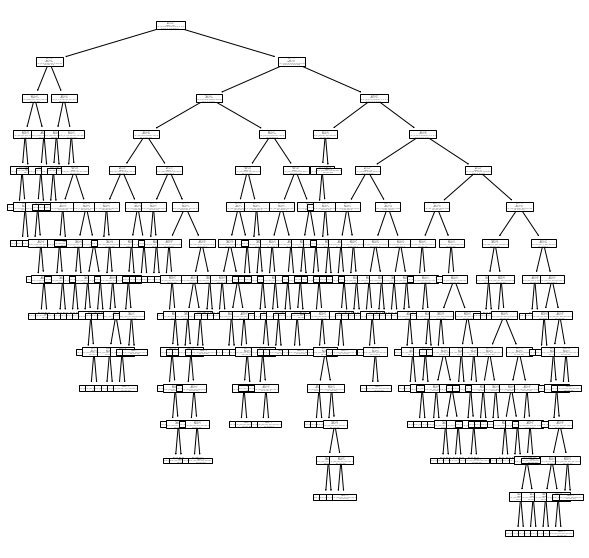

In [0]:
#doing decision tree classification with gini index
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100, min_samples_leaf=1) 
# Performing training 
model=clf_gini.fit(X_train, y_train) 
model
y_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
plt.figure(figsize=(10,10))

tree.plot_tree(model)


              precision    recall  f1-score   support

         1.0       1.00      0.68      0.81        22
         2.0       0.90      1.00      0.95        26
         3.0       0.83      0.80      0.82        25
         4.0       1.00      0.67      0.80        30
         5.0       0.80      0.50      0.62        24
         6.0       0.96      1.00      0.98        25
         7.0       0.90      0.75      0.82        24
         8.0       0.72      0.88      0.79        24
        10.0       1.00      1.00      1.00        19
        11.0       0.61      0.74      0.67        23
        12.0       0.87      0.83      0.85        24
        13.0       1.00      1.00      1.00        26
        14.0       0.50      0.72      0.59        25
        15.0       0.96      1.00      0.98        25
        16.0       1.00      1.00      1.00        24
        17.0       1.00      0.73      0.84        33
        18.0       0.61      0.77      0.68        26
        19.0       0.75    

[Text(273.6810141509434, 513.4, 'X[3] <= 2.5\nentropy = 4.391\nsamples = 1234\nvalue = [62, 58, 59, 54, 60, 59, 60, 60, 65, 61, 60, 58\n59, 59, 60, 51, 58, 60, 59, 55, 57]'),
 Text(163.51768867924528, 453.0, 'X[3] <= 1.5\nentropy = 3.907\nsamples = 767\nvalue = [7, 48, 0, 39, 51, 0, 60, 60, 65, 7, 5, 50, 59\n0, 60, 51, 45, 50, 59, 0, 51]'),
 Text(69.96933962264151, 392.6, 'X[2] <= 1.5\nentropy = 3.375\nsamples = 478\nvalue = [4, 32, 0, 31, 51, 0, 50, 60, 65, 6, 0, 0, 59\n0, 0, 33, 44, 43, 0, 0, 0]'),
 Text(17.547169811320757, 332.2, 'X[4] <= 1.5\nentropy = 1.383\nsamples = 108\nvalue = [3, 32, 0, 0, 0, 0, 0, 8, 65, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(7.018867924528302, 271.8, 'X[11] <= 1.5\nentropy = 0.194\nsamples = 67\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(3.509433962264151, 211.39999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(10.528301886792454, 211.39999

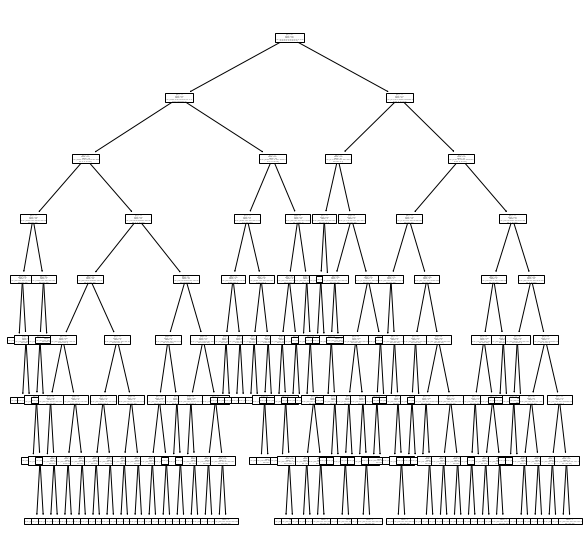

In [0]:
#doing decision tree classification with gini index
clf_gini = DecisionTreeClassifier(criterion = "entropy",random_state = 50,min_samples_leaf=1,max_depth=8) 
# Performing training 
model=clf_gini.fit(X_train, y_train) 
y_pred = clf_gini.predict(X_test) 
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
#print("acc=",accuracy_score(data_sam_impure_bp['bp'],y_pred)*100)
from sklearn import tree
plt.figure(figsize=(10,10))

tree.plot_tree(model)


In [0]:
#doing randdom forest
clf = RandomForestClassifier(max_depth=5, random_state=42)
model=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         1.0       1.00      0.68      0.81        22
         2.0       0.90      1.00      0.95        26
         3.0       0.91      0.80      0.85        25
         4.0       0.71      0.67      0.69        30
         5.0       0.79      0.46      0.58        24
         6.0       0.86      1.00      0.93        25
         7.0       0.89      0.67      0.76        24
         8.0       0.84      0.88      0.86        24
        10.0       1.00      1.00      1.00        19
        11.0       0.53      0.43      0.48        23
        12.0       0.69      0.92      0.79        24
        13.0       1.00      0.69      0.82        26
        14.0       0.53      0.72      0.61        25
        15.0       0.86      1.00      0.93        25
        16.0       0.83      1.00      0.91        24
        17.0       1.00      0.73      0.84        33
        18.0       0.62      0.81      0.70        26
        19.0       0.70    

In [0]:
y_train

array([ 6., 16., 16., ..., 10., 18., 14.])

In [0]:
#doing Knn
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.62      0.23      0.33        22
         2.0       0.87      1.00      0.93        26
         3.0       0.69      0.80      0.74        25
         4.0       0.75      0.50      0.60        30
         5.0       1.00      0.17      0.29        24
         6.0       0.96      1.00      0.98        25
         7.0       0.88      0.88      0.88        24
         8.0       0.88      0.88      0.88        24
        10.0       1.00      1.00      1.00        19
        11.0       0.41      0.48      0.44        23
        12.0       0.59      0.71      0.64        24
        13.0       0.84      1.00      0.91        26
        14.0       0.49      0.84      0.62        25
        15.0       0.89      1.00      0.94        25
        16.0       1.00      1.00      1.00        24
        17.0       1.00      0.79      0.88        33
        18.0       0.58      0.69      0.63        26
        19.0       0.80    

In [0]:
#doing gausssian
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.14      0.24        22
         2.0       0.79      1.00      0.88        26
         3.0       0.56      0.40      0.47        25
         4.0       0.38      0.10      0.16        30
         5.0       0.75      0.12      0.21        24
         6.0       1.00      1.00      1.00        25
         7.0       0.34      0.46      0.39        24
         8.0       0.88      0.29      0.44        24
        10.0       1.00      1.00      1.00        19
        11.0       0.75      0.26      0.39        23
        12.0       0.42      0.21      0.28        24
        13.0       0.50      0.15      0.24        26
        14.0       0.00      0.00      0.00        25
        15.0       0.96      1.00      0.98        25
        16.0       1.00      1.00      1.00        24
        17.0       0.40      1.00      0.57        33
        18.0       1.00      0.08      0.14        26
        19.0       0.16    

In [0]:
#doing svm
clf = svm.SVC()
model=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
y_test,y_pred


              precision    recall  f1-score   support

         1.0       1.00      0.82      0.90        22
         2.0       0.90      1.00      0.95        26
         3.0       0.87      0.80      0.83        25
         4.0       1.00      0.77      0.87        30
         5.0       0.72      0.54      0.62        24
         6.0       1.00      1.00      1.00        25
         7.0       0.86      0.75      0.80        24
         8.0       0.95      0.88      0.91        24
        10.0       1.00      1.00      1.00        19
        11.0       0.55      0.74      0.63        23
        12.0       0.88      0.88      0.88        24
        13.0       1.00      1.00      1.00        26
        14.0       0.58      0.88      0.70        25
        15.0       1.00      1.00      1.00        25
        16.0       1.00      1.00      1.00        24
        17.0       1.00      0.79      0.88        33
        18.0       0.66      0.81      0.72        26
        19.0       0.96    

(array([14., 11., 22., 19., 16.,  8., 21.,  4., 15.,  3., 21.,  2.,  8.,
        10., 16., 13.,  5., 22., 14.,  1., 17., 12., 10., 11., 14.,  6.,
         1.,  2., 20., 21., 15., 20.,  5., 11., 22.,  3.,  8.,  1., 11.,
         3., 14., 14., 20., 16., 17.,  4., 22., 18., 22.,  3., 17.,  3.,
         6., 20., 16.,  6., 16.,  2., 17., 15., 16.,  1., 11.,  5., 21.,
        15., 12., 14.,  8., 19., 10.,  8., 21.,  3.,  6., 16.,  3.,  7.,
        16., 22., 11., 13.,  3.,  3., 11., 15.,  5., 17., 10., 15., 11.,
        17., 16., 12.,  2.,  4., 22., 11., 22.,  3., 22., 14.,  4.,  2.,
        21.,  5., 19.,  8., 21.,  8., 17.,  6.,  4.,  2., 17., 15., 12.,
        18., 14.,  6., 19., 22., 20., 17.,  2.,  1.,  6., 13.,  8.,  5.,
        13., 17.,  6., 12., 10., 22.,  2.,  1., 13., 15.,  1.,  1., 15.,
         4.,  6., 12., 16.,  3., 13.,  8.,  7.,  2.,  1., 19., 14.,  7.,
        22., 17., 12.,  6.,  1., 16., 11., 21.,  2., 17.,  2.,  4.,  4.,
        17., 13.,  7., 20., 21., 16., 19., 21., 15.